In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_dir= "../data/raw_data/Training"
test_data_dir = "../data/raw_data/Testing"

In [4]:
filepaths = []
labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
X_train, X_valid = train_test_split(train_df,  train_size=0.8 , shuffle= True, random_state= 123)

In [6]:
X_train.head()

,filepaths,labels
2487,../data/raw_data/Training/glioma/Tr-gl_0394.jp...,glioma
2542,../data/raw_data/Training/glioma/Tr-gl_0702.jp...,glioma
3528,../data/raw_data/Training/meningioma/Tr-me_042...,meningioma
5720,../data/raw_data/Training/pituitary/Tr-pi_1338...,pituitary
829,../data/raw_data/Training/glioma/Tr-gl_0339.jpg,glioma


In [42]:
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator(rescale=1/255)
val_gen = ImageDataGenerator(rescale=1/255)

train_gen = tr_gen.flow_from_dataframe( X_train, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


val_gen = val_gen.flow_from_dataframe( X_valid, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


Found 4602 validated image filenames belonging to 4 classes.
Found 1110 validated image filenames belonging to 4 classes.


/home/joelbrice/.pyenv/versions/3.10.6/envs/brainmap/lib/python3.10/site-packages/keras/preprocessing/image.py:1139: UserWarning: Found 4537 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
/home/joelbrice/.pyenv/versions/3.10.6/envs/brainmap/lib/python3.10/site-packages/keras/preprocessing/image.py:1139: UserWarning: Found 1175 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


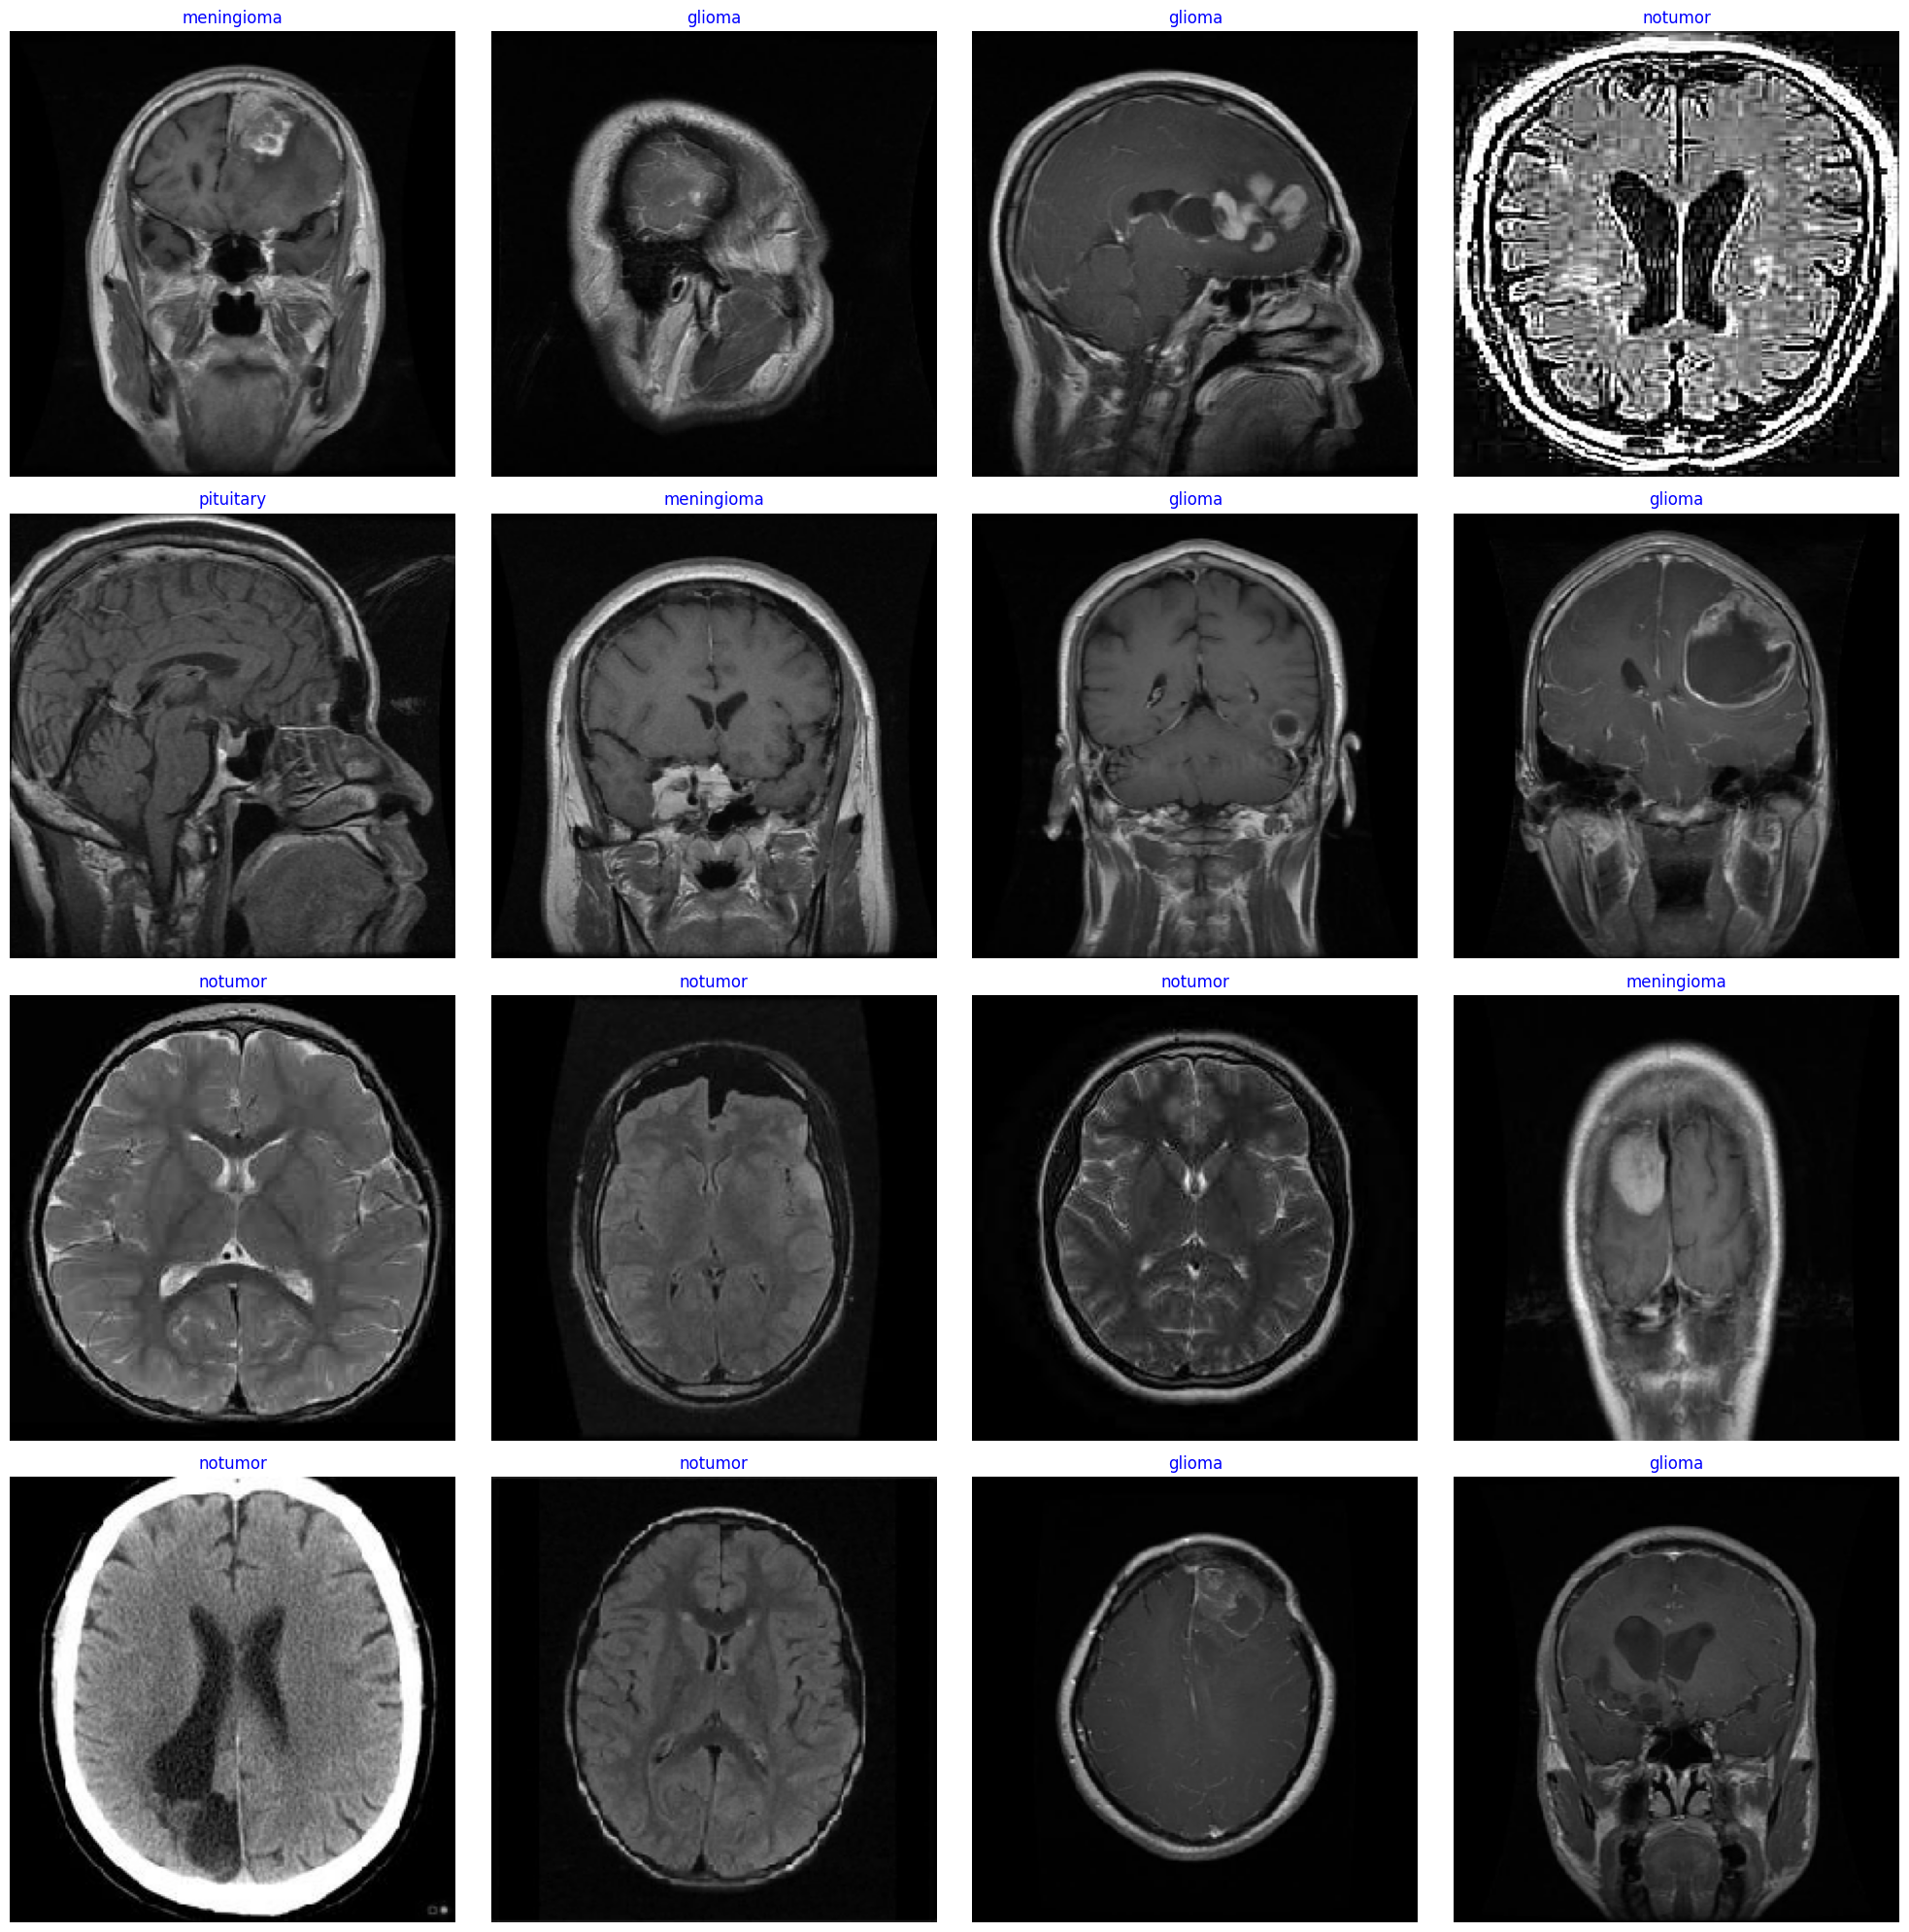

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's keys (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
images.shape

(16, 224, 224, 3)

In [45]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

def convert_to_grayscale(image, label):
    grayscale_image = tf.image.rgb_to_grayscale(image)
    return grayscale_image, label

grayscale_dataset = dataset.map(convert_to_grayscale)

In [46]:
grayscale_dataset

<MapDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>